**ENGIE Energy Access Data Analysis Project**

By: EMMANUEL REAGAN NSUBUGA

This exploration aims to unravel insights and patterns within the call records, shedding light on various aspects such as call outcomes, durations, and topics.

EEA customers, having availed themselves of solar product loans, benefit from a dedicated call center featuring three specialized teams: Sales, Support, and Success. Each team serves a unique purpose, ranging from facilitating sales transactions in remote villages to ensuring a smooth customer experience and encouraging timely repayments. The diverse nature of calls, spanning technical challenges, sales inquiries, and customer outreach, presents an opportunity to glean valuable insights into customer behavior, preferences, and satisfaction levels.

This data analysis endeavors to address a spectrum of questions, ranging from the identification of factors influencing customer retention and service center interactions to uncovering correlations between various variables. Furthermore, it seeks to examine if customer satisfaction can be inferred from call outcomes or durations, and if specific call topics are associated with varying levels of satisfaction.

Through exploratory data analysis, statistical examinations, and visualization techniques, I aim to extract actionable insights that can inform strategic decisions, optimize resource allocation, and ultimately contribute to an enriched customer experience within the realm of solar product financing at EEA

**Executive Summary of Analysis Results**

**Overview of Call Center Data Analysis**
The analysis of the EEA call center data provides valuable insights into customer interactions, call patterns, and the performance of different teams within the call center. Key aspects of the analysis include:

1. *Customer Distribution by Account State and Occupation*
Account State Distribution:

The majority of customers are actively 'In Repayment,' followed by completed loans.
A smaller subset falls into 'Cancelled' or 'Suspended,' indicating areas that may require further attention.
Occupational Diversity:

Farmers constitute the largest occupational group, highlighting significant agricultural involvement.
Small business owners, Boda Boda operators, teachers, and shopkeepers also represent substantial portions of the customer base.

2. *Language Diversity and Communication Preferences*
Language Representation:
Luganda emerges as the most prevalent language, reflecting a significant portion of the customer demographic.
English is well-represented, suggesting a diverse customer base with proficiency in English.
Rich linguistic diversity is observed, with various languages contributing to the overall diversity of the customer base.

3. *Call Direction and Duration Analysis*
Call Direction Insights:

Incoming calls dominate, indicating strong customer engagement.
Outgoing calls, though fewer, represent a proactive approach in customer outreach.
Call Duration Patterns:

Varied call durations across teams and topics suggest differences in complexity.
Dropped calls are observed, necessitating investigation into connectivity issues.

4. *Account State Analysis and Pair Plot Patterns*
Account State Overview:

The "In Repayment" state dominates, indicating a significant number of accounts actively making payments.
Completed accounts are fewer in number, while cancelled and suspended accounts show minimal representation.
Pair Plot Patterns:

Accounts in repayment tend to have lower account age and varied call durations.
Completed accounts exhibit scattered patterns with predominantly shorter call durations.

5. *Boxplot Analysis for Account Age, Call Duration, and Occupation/Language Relations*
Boxplot Patterns:
Occupation and language significantly influence account age, call duration, and call direction.
Certain occupations and languages are associated with older or newer accounts, longer or shorter call durations, and incoming or outgoing calls.

6. *Daily and Time-Based Call Traffic Analysis*
Daily and Time-Based Patterns:
Peak call traffic on Monday to Wednesday suggests higher customer engagement early in the week.
Morning and midday periods observe increased call traffic, while weekends experience lower activity.

7. *Call Outcome and Topic Analysis*
Call Outcome Patterns:

Resolved calls are more prominent for "In Repayment," indicating effective communication.
Unresolved/Repair calls show variability, suggesting more complex issues.
Call Topic Analysis:

Varied call topics for different account states highlight the diverse nature of customer inquiries and issues.

8. *Customer Interaction Dynamics*
Customer Interaction Dynamics:
Significant variability in daily customer counts suggests diverse patterns in customer interactions.
Further investigation is needed to understand the reasons behind peaks and fluctuations.

9. *Multiple Calls and Call Duration by Topic Analysis*
Customer Engagement:

Approximately 5,437 customers engaged in multiple calls during the two-week period.
Call Duration Variation:

Wide variation in call durations across different call topics indicates the influence of topic complexity.

10. *Team Performance and Outcomes*
Team-Specific Patterns:
Technical and Battery Performance teams handle complex issues, leading to longer call durations.
The "Other" team shows a higher number of resolved cases, indicating effective issue resolution.

I start by importing the pandas dataframe that i'm going to use to clean and transform my data after which I load my dataset and then inspect it with a print() statement.

In [2]:
import pandas as pd

In [3]:
csv_file_path= "R:\\Engie project\\eea_call_records (data for case study).csv"

In [4]:
df = pd.read_csv(csv_file_path, encoding='latin1')

In [5]:
print(df)

       ï»¿call_id  destination_person_id  source_person_id  account_age  \
0         2807990                  86394            269898          301   
1         2807991                  86394            320367          122   
2         2807992                 212967            129042          695   
3         2807993                 114159            372282           22   
4         2807994                  86394            366749           44   
...           ...                    ...               ...          ...   
32023     2855830                 338414            361079           68   
32024     2855832                 157397            302921          183   
32025     2855835                  80646            229800          386   
32026     2855836                 338372              8029         1146   
32027     2855837                 124255            387315            0   

      account_state             occupation    language call_direction  \
0      In Repayment       

The data provided has a unique identifier 'ï»¿call_id' at the beginning of the column name. This could be an encoding issue or an artifact from the data import process. This will need to be renamed to 'call_id' to make it consistent with the rest of the column names.

In [6]:
# Display basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32028 entries, 0 to 32027
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ï»¿call_id             32028 non-null  int64  
 1   destination_person_id  32028 non-null  int64  
 2   source_person_id       32028 non-null  int64  
 3   account_age            32028 non-null  int64  
 4   account_state          32028 non-null  object 
 5   occupation             31933 non-null  object 
 6   language               32027 non-null  object 
 7   call_direction         32028 non-null  object 
 8   call_duration          32028 non-null  float64
 9   call_outcome           32028 non-null  object 
 10  call_end_date          32028 non-null  object 
 11  call_topics            32028 non-null  object 
 12  call_topic_group       32028 non-null  object 
dtypes: float64(1), int64(4), object(8)
memory usage: 3.2+ MB


df is a pandas dataframe with 32028 entries and 13 columns(variables). From this inspection, it's evident that the 'occupation' and 'language' variables have missing variables. The call_end_date variable is an object and this will need to be transformed into datetime.

**Inspecting Missing Values**

In [7]:
# Check for missing values
df.isnull().sum()

ï»¿call_id                0
destination_person_id     0
source_person_id          0
account_age               0
account_state             0
occupation               95
language                  1
call_direction            0
call_duration             0
call_outcome              0
call_end_date             0
call_topics               0
call_topic_group          0
dtype: int64

Further inspection shows there are 95  entries entries for the occupation variable with missing values and only one missing entry for language.

Next, i rename the first identity column to 'call_id' to be consistent with other variables.

In [8]:
# Rename the 'ï»¿call_id' column to 'call_id'
df = df.rename(columns={'ï»¿call_id': 'call_id'})


**Dealing with Missing Data**

On studying the data,one of the entries for occupation is 'other' to mean any other entry and it is logical to impute this value for all missing entries for the 'occupation' variable

In [9]:
# Impute 'Other' for missing values in 'occupation'
df['occupation'].fillna('Other', inplace=True)

I impute the most common language for the missing entry in the 'language' variable.

In [10]:
# Impute the most common language for missing values in 'language'
df['language'].fillna(df['language'].mode().iloc[0], inplace=True)

On running df.info(), our data is found to have no more missing values.

In [11]:
# Again Display basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32028 entries, 0 to 32027
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   call_id                32028 non-null  int64  
 1   destination_person_id  32028 non-null  int64  
 2   source_person_id       32028 non-null  int64  
 3   account_age            32028 non-null  int64  
 4   account_state          32028 non-null  object 
 5   occupation             32028 non-null  object 
 6   language               32028 non-null  object 
 7   call_direction         32028 non-null  object 
 8   call_duration          32028 non-null  float64
 9   call_outcome           32028 non-null  object 
 10  call_end_date          32028 non-null  object 
 11  call_topics            32028 non-null  object 
 12  call_topic_group       32028 non-null  object 
dtypes: float64(1), int64(4), object(8)
memory usage: 3.2+ MB


In [12]:
# Again Checking if the imputation has worked perfectly fine
df.isnull().sum()

call_id                  0
destination_person_id    0
source_person_id         0
account_age              0
account_state            0
occupation               0
language                 0
call_direction           0
call_duration            0
call_outcome             0
call_end_date            0
call_topics              0
call_topic_group         0
dtype: int64

**Dealing with duplicate values**

Duplicate records can introduce inconsistencies in the dataset, potentially affecting the reliability of the findings.
Eliminating duplicates ensures a more uniform and reliable dataset, contributing to the integrity of your analysis. For consistency and accuracy, i've chosen to drop any duplicate values.

In [15]:
#drop duplicates
df = df.drop_duplicates()

**Detecting outliers.**

Next, i select all numeric columns so i can detect for outliers and ploting a boxplot.

In [19]:
# Select numeric columns
import numpy as np
numeric_columns = df.select_dtypes(include=np.number).columns

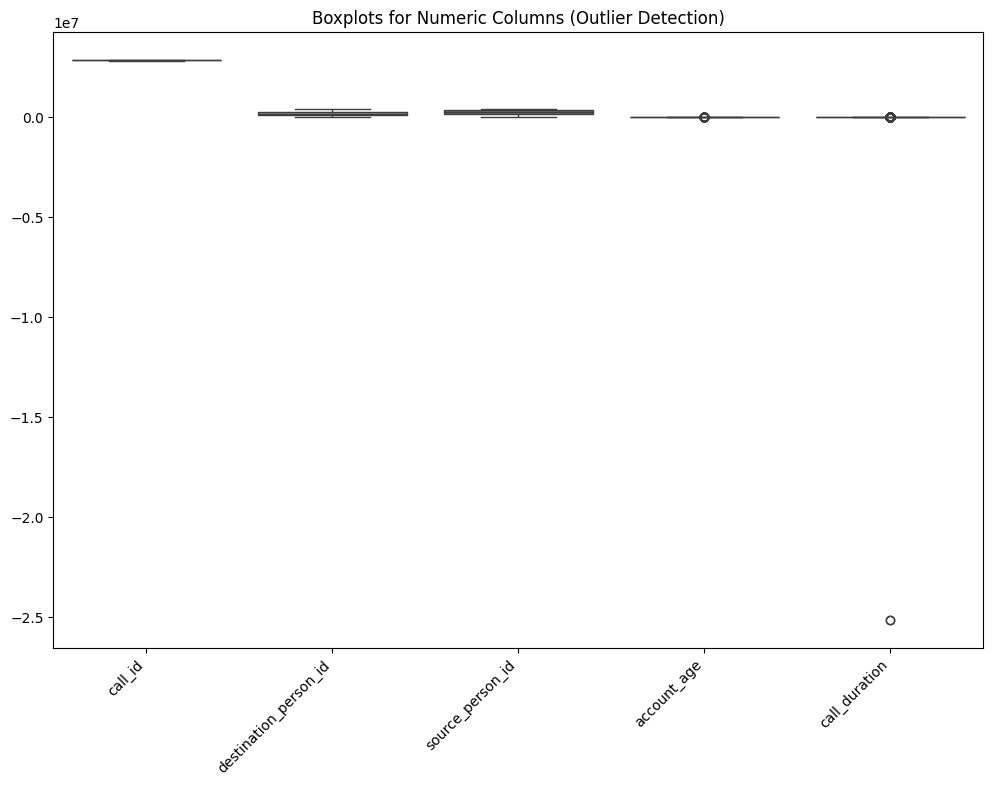

In [22]:
# Plot boxplots for numeric columns to visualize outliers
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 8))
sns.boxplot(data=df[numeric_columns])
plt.title('Boxplots for Numeric Columns (Outlier Detection)')
plt.xticks(rotation=45, ha='right')
plt.show()

The columns with 'id' can't have ouliers and indeed the boxplot shows they do not have outliers on addition to the 'account_age' variable.  There is one distinct outlier represented by a single point located near -2.5 on the y-axis.The analysis shows that this outlier belongs to the 'call_duration' variable and i've chosen not to remove this outlier because it's possible that the customer had a long call with the customer support team rendering the entry valuable for the analysis.

In [28]:
#Display the data types
data_types = df.dtypes

# Display the data types
print("Data Types:")
print(data_types)


Data Types:
call_id                    int64
destination_person_id      int64
source_person_id           int64
account_age                int64
account_state             object
occupation                object
language                  object
call_direction            object
call_duration            float64
call_outcome              object
call_end_date             object
call_topics               object
call_topic_group          object
dtype: object


The call_end_date column is currently of type 'object' and in the snippet below, this variable is converted to the datetime format as it's more compartible with my analysis.

In [29]:
# Convert 'call_end_date' to datetime format
df['call_end_date'] = pd.to_datetime(df['call_end_date'], format='%d/%m/%Y %H:%M')

**Descriptive Statistics for Categorical Variables:**

In [30]:
# Descriptive statistics for categorical variables
categorical_variables = ['account_state', 'occupation', 'language', 'call_direction']

for column in categorical_variables:
    print(f"\nDescriptive statistics for {column}:")
    print(df[column].value_counts())



Descriptive statistics for account_state:
account_state
In Repayment    28347
Complete         2992
Cancelled         542
Suspended         145
Name: count, dtype: int64

Descriptive statistics for occupation:
occupation
Farmer                        11484
Small Business Owner           5521
Other                          2361
Boda Boda                      1901
Teacher                        1878
Shop Keeper                    1188
Construction                   1132
Market Trader                  1083
Driver                          791
Mechanic / Technician           605
Carpenter                       490
Fisherman                       488
Security Guard                  363
Health Worker                   338
Government / Civil Servant      307
Tailor                          252
Office Work                     237
Cattle Trader                   231
Police                          222
MM Agent                        213
Religious Leader                185
Butcher               

Descriptive statistics were computed for the 'account_state' variable, revealing the distribution of customers across different states within the solar product financing system. The majority of customers are actively 'In Repayment,' followed by a significant number who have successfully completed their loans. A smaller subset falls into 'Cancelled' or 'Suspended' states, indicating areas that may require further attention.

The analysis of the 'occupation' variable provides valuable insights into the diverse professional backgrounds of customers engaged in the EEA solar product financing program. The following breakdown outlines the distribution of customers across various occupations:

Farmer (11,484): Farmers constitute the largest occupational group among EEA customers, highlighting the significant presence of individuals involved in agriculture within the customer base.

Small Business Owner (5,521): Small business owners form a substantial portion of the customer demographic, indicating entrepreneurial engagement and potential economic diversity within the customer base.

Other (2,361): The 'Other' category encompasses a range of occupations not explicitly listed, showcasing the diversity and uniqueness of professional backgrounds among EEA customers.

Boda Boda (1,901): Boda Boda operators, involved in motorcycle transportation services, represent a notable occupational segment, suggesting a presence of individuals engaged in the transportation industry.

Teacher (1,878): Teachers constitute a significant portion of the customer base, reflecting the involvement of individuals in the education sector.

Shop Keeper (1,188): Shopkeepers play a substantial role in the EEA customer demographic, indicating the presence of individuals engaged in retail businesses.

Construction (1,132): Individuals involved in construction activities form a noteworthy occupational group, possibly indicating engagement in the construction industry.

Market Trader (1,083): Market traders are represented prominently, suggesting active participation in trade and commerce within local markets.

Driver (791):Drivers, involved in various forms of transportation, constitute a distinct occupational group within the customer base while Mechanics and Technicians (605) are fairly represented as well.

**Summary of Descriptive Statistics for Language**

Luganda emerges as the most prevalent language, with 9,517 customers primarily communicating in Luganda. This highlights the significant representation of Luganda speakers within the customer demographic. The dataset reflects a rich linguistic diversity, with customers representing various language communities. Notable languages include Lunyankore, English, Lusoga, and Ateso, each contributing to the overall diversity of the customer base.

English, being a widely spoken language, is well-represented with 3,677 customers. This suggests a diverse customer demographic with proficiency in English, facilitating effective communication and support services.

The distribution of languages such as Lugbara, Lusoga, Lunyankore, and others indicates the program's engagement with diverse regional and cultural communities. 

**Descriptive Statistics for Call Direction**

The higher count of incoming calls suggests a strong customer engagement with the call center's services. Understanding the nature and topics of these incoming calls can provide insights into customer queries, concerns, and preferences.

Outgoing calls, though fewer in number, represent a proactive approach by the call center in reaching out to customers. Analysis of outbound calls can reveal patterns in customer outreach strategies and the effectiveness of proactive engagement initiatives.

**Strategic Implications:**

The call center may consider optimizing resources and staffing to efficiently handle the influx of incoming calls, ensuring prompt and effective customer support.

Analysis of call topics and outcomes for both incoming and outgoing calls can guide the development of targeted strategies to enhance customer satisfaction and address common issues.

Proactive outbound calls present an opportunity to gather feedback, conduct surveys, and provide additional support. Understanding the outcomes of outgoing calls can inform the effectiveness of these proactive initiatives.

**Distribution of Account states**

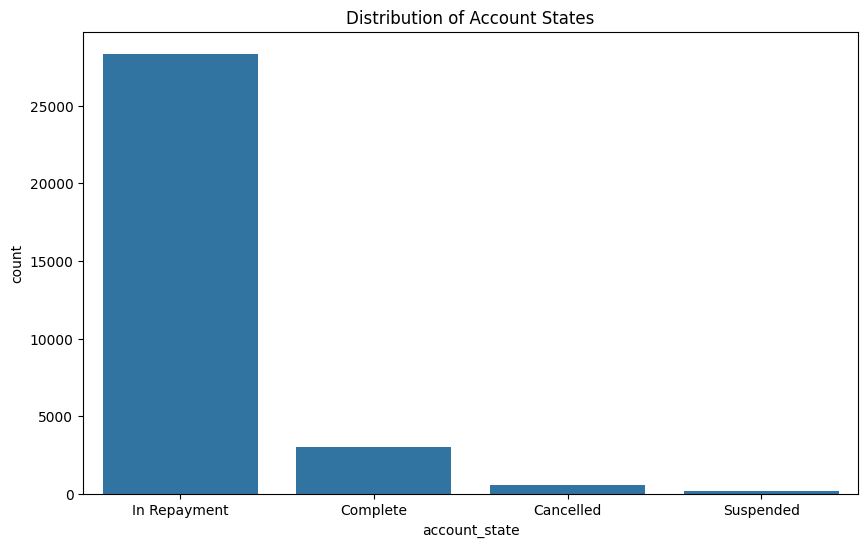

In [32]:
# count plot for 'account_state'
plt.figure(figsize=(10, 6))
sns.countplot(x='account_state', data=df)
plt.title('Distribution of Account States')
plt.show()

The bar for “In Repayment” is the tallest, indicating over 25,000 counts. This suggests that a large number of accounts are in the repayment state while the one for “Complete” is much shorter, showing around 5,000 counts, indicating a smaller number of accounts are in the complete state. The bars for “Cancelled” and “Suspended” are minimal in height, indicating very low counts, suggesting that very few accounts are in these states.

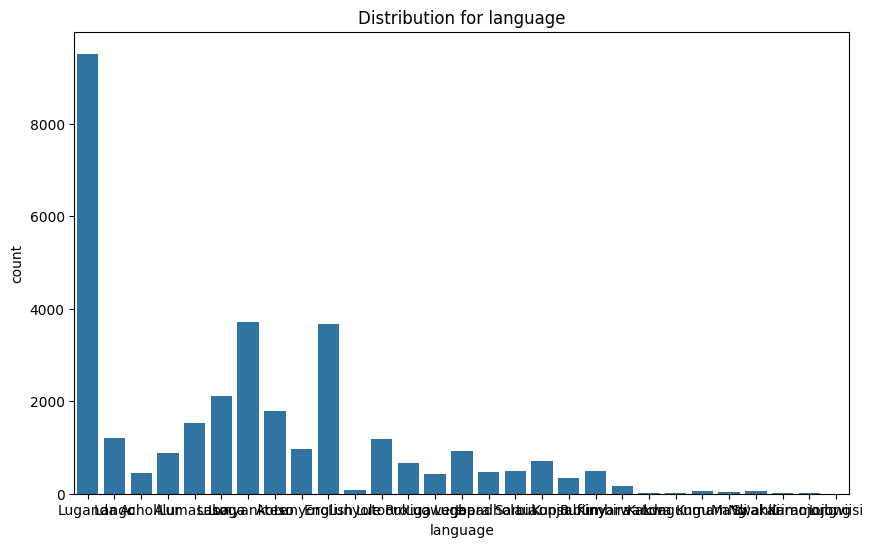

In [34]:

#count plot for 'language'
plt.figure(figsize=(10, 6))
sns.countplot(x='language', data=df)
plt.title('Distribution for language')
plt.show()

**How does the direction of calls (incoming and outgoing) distribute across different account states (Cancelled, Complete, In Repayment, Suspended)?**

In [36]:
# crosstabulation for 'account_state' and 'call_direction'
cross_tab = pd.crosstab(df['account_state'], df['call_direction'])
print(cross_tab)


call_direction  Incoming  Outgoing
account_state                     
Cancelled            443        99
Complete            1791      1201
In Repayment       21986      6361
Suspended             64        81


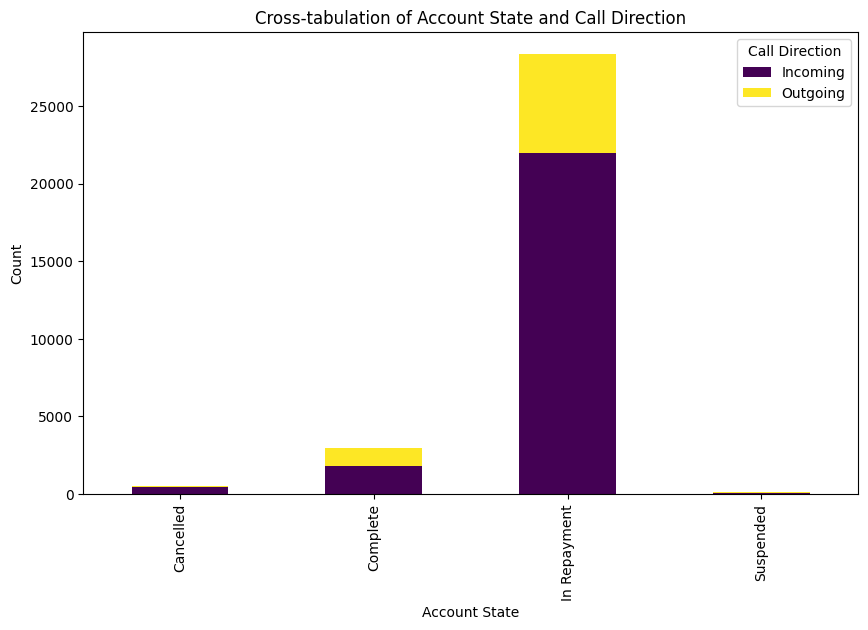

In [63]:
# Plotting the stacked bar chart
cross_tab.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis')

# Adding labels and title
plt.title('Cross-tabulation of Account State and Call Direction')
plt.xlabel('Account State')
plt.ylabel('Count')

# Displaying the legend
plt.legend(title='Call Direction', loc='upper right')

# Displaying the plot
plt.show()

There is a small number of cancelled accounts with only outgoing calls. A moderate number of complete accounts have both incoming and outgoing calls but in low quantities.

A large number of accounts are in repayment with a high volume of both incoming and outgoing calls. This category dominates the graph and there are very few suspended accounts represented in the plot

**Correlation Heatmap for Numerical Variables:** What is the correlation between different numerical variables in our dataset?

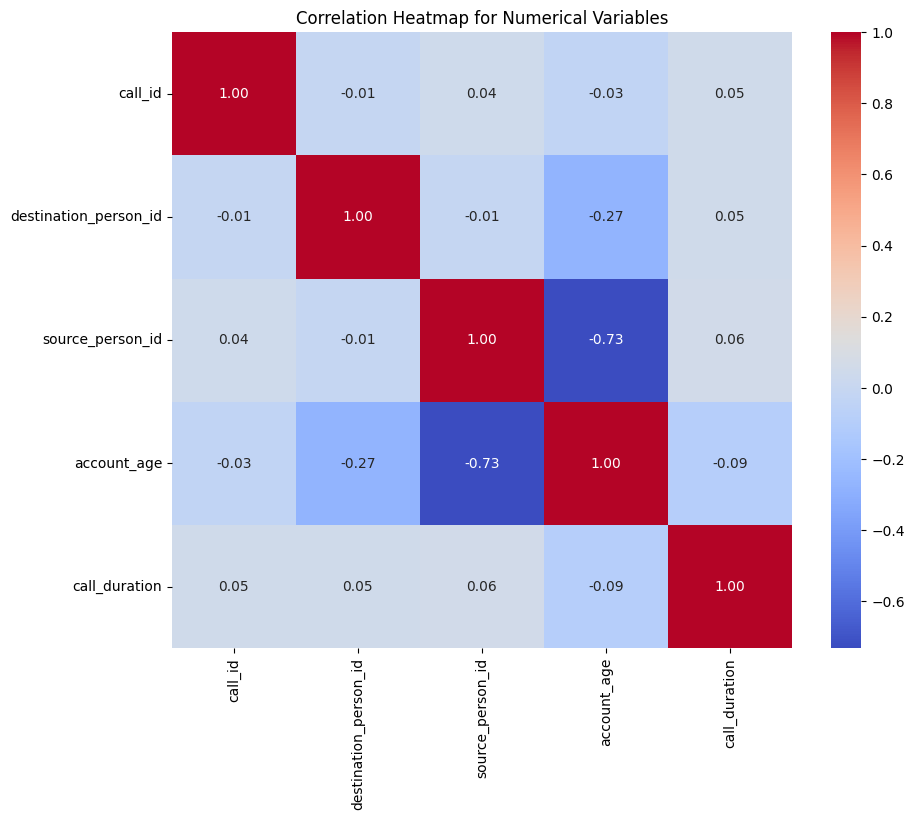

In [37]:

# Select numerical variables for correlation analysis
numerical_variables = df.select_dtypes(include=['int64', 'float64']).columns

# Calculate correlation matrix
correlation_matrix = df[numerical_variables].corr()

# Plot a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap for Numerical Variables')
plt.show()


There is a strong positive correlation of 0.73 between source_person_id and account_age. This suggests that as the source_person_id increases, the account_age tends to increase as well.
Most of the other correlations are weak as indicated by the light blue or white colors. This suggests that there is little linear relationship between these pairs of variables. The positive correlation of 0.73 has no statistical relevance.

**How are ‘account_age’ and ‘call_duration’ related to each other for different account states?**: Pairplot for the Selected Variables

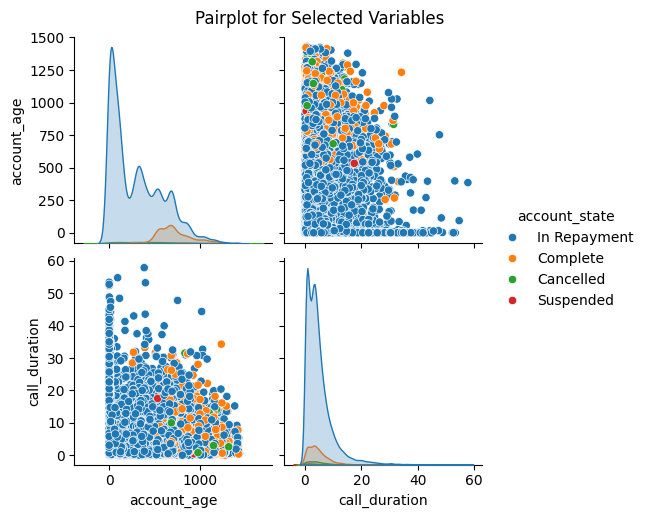

In [38]:
# Select a subset of variables for pairplot
selected_variables = ['account_age', 'call_duration']

# Add hue for a categorical variable (e.g., 'account_state')
selected_variables_with_hue = selected_variables + ['account_state']

# Plot a pairplot
sns.pairplot(df[selected_variables_with_hue], hue='account_state', diag_kind='kde')
plt.suptitle('Pairplot for Selected Variables', y=1.02)
plt.show()


The Pair plot suggests the following:

In Repayment (blue): Accounts in repayment tend to have a lower account age and varied call durations.

Complete (orange): Completed accounts are scattered across all ages but predominantly have shorter call durations.

Cancelled (green) and Suspended (red): Cancelled and suspended accounts are less frequent and don’t show a clear pattern in relation to account age or call duration.

The top left graph shows the distribution of ‘account_age’, with a peak around 250 days. The bottom right graph shows the distribution of ‘call_duration’, with a peak around 10 minutes. This suggests that most calls last about 10 minutes and most accounts are around 250 days old.

While these patterns can provide insights, further investigation would be needed to determine any causal relationships. For example, why accounts in repayment have a lower account age or why completed accounts predominantly have shorter call durations. These insights could be useful for strategizing customer service efforts.

**How does account age vary with different account states (In Repayment, Complete, Cancelled, Suspended)?** Boxplots for Categorical vs. Numerical Variables:

**How does call duration vary with different account states (In Repayment, Complete, Cancelled, Suspended)?**

**How does account age vary with different occupations?**

**How does account age vary with different languages?**

**How does account age vary with the direction of calls (incoming or outgoing)?**

**How does call duration vary with call direction (incoming vs. outgoing)?**

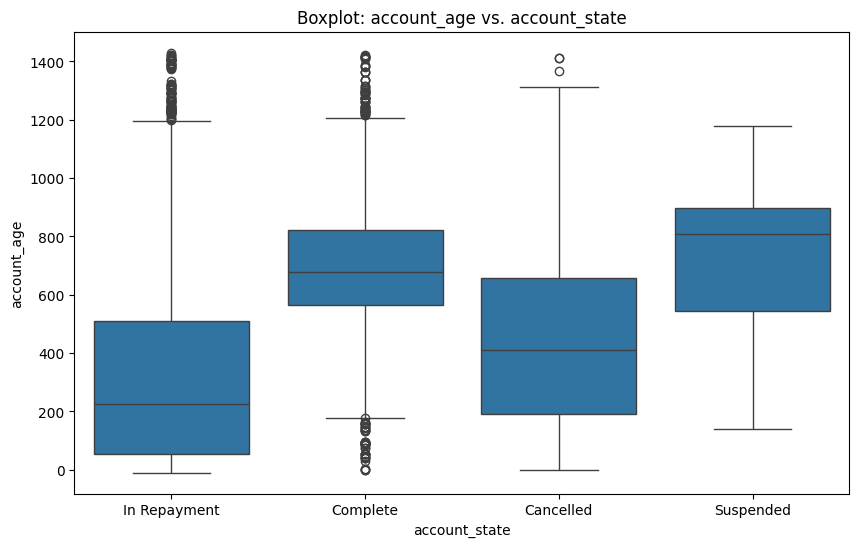

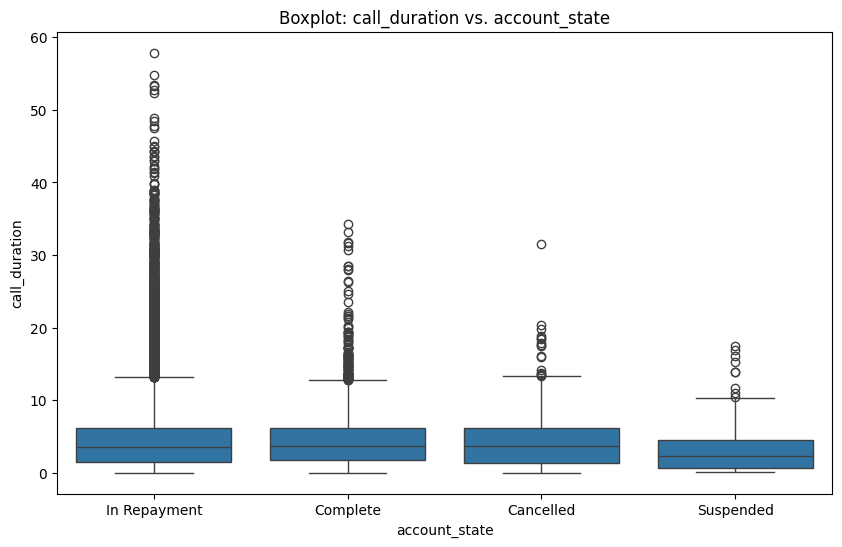

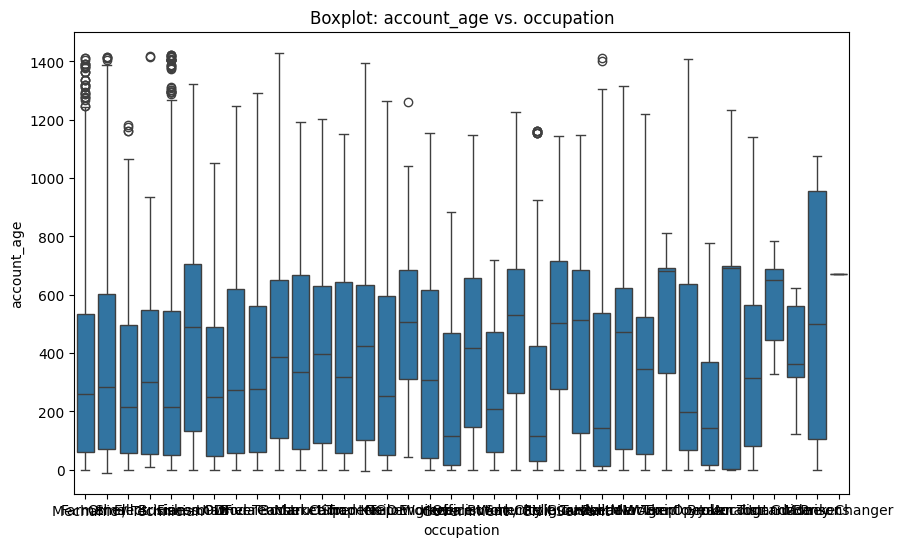

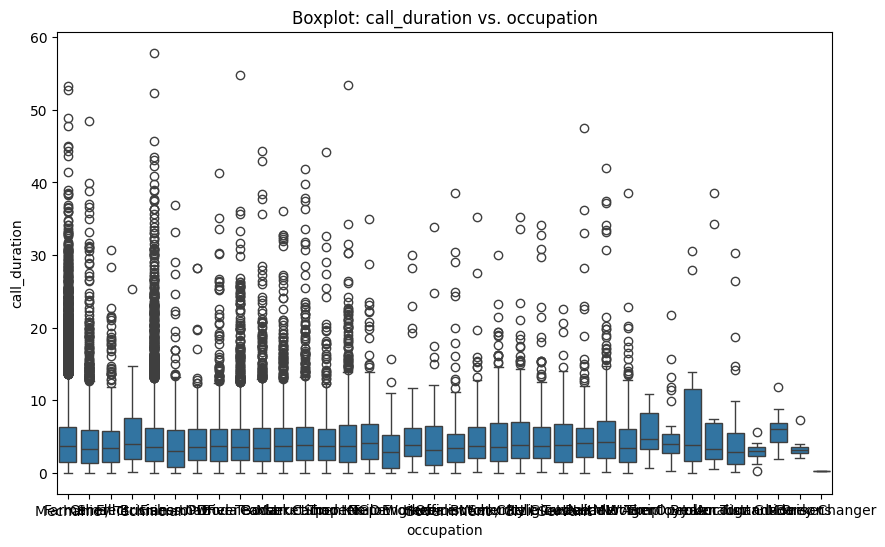

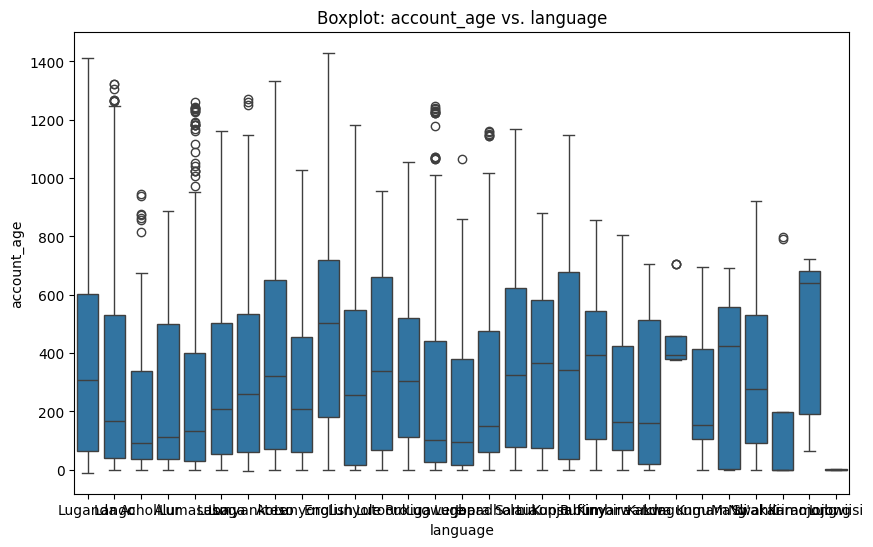

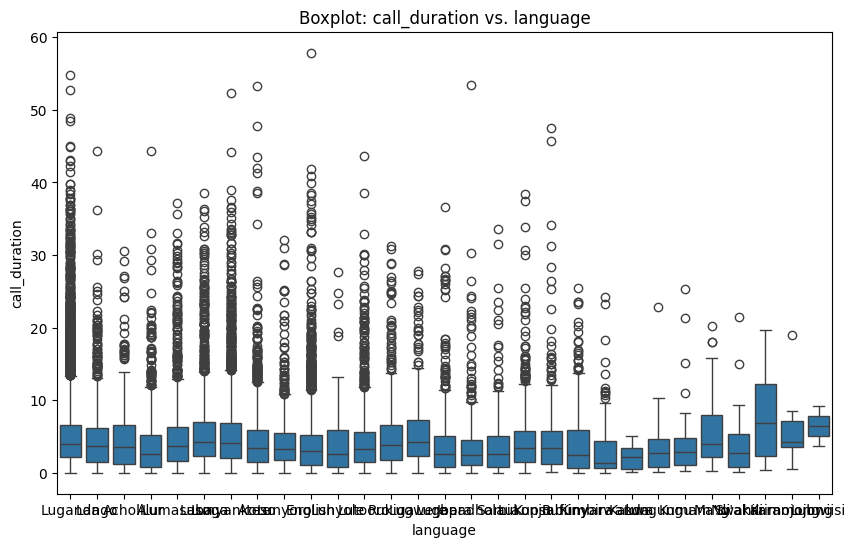

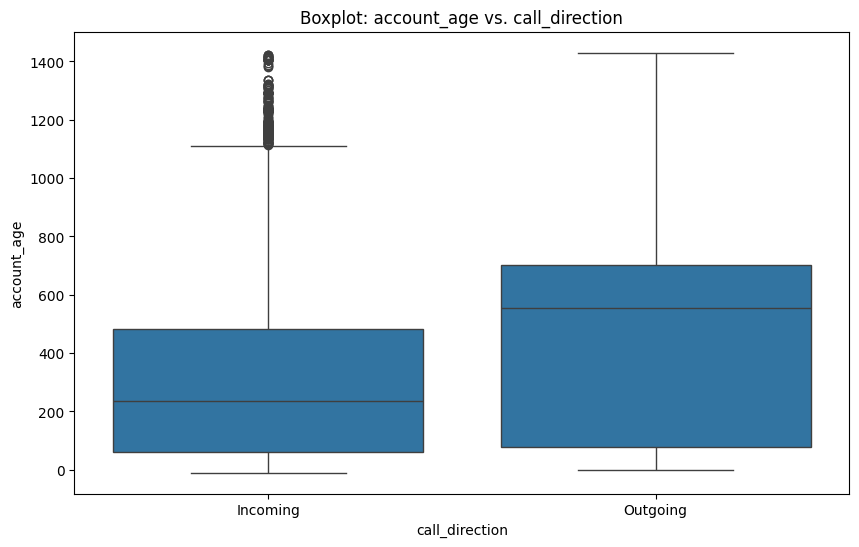

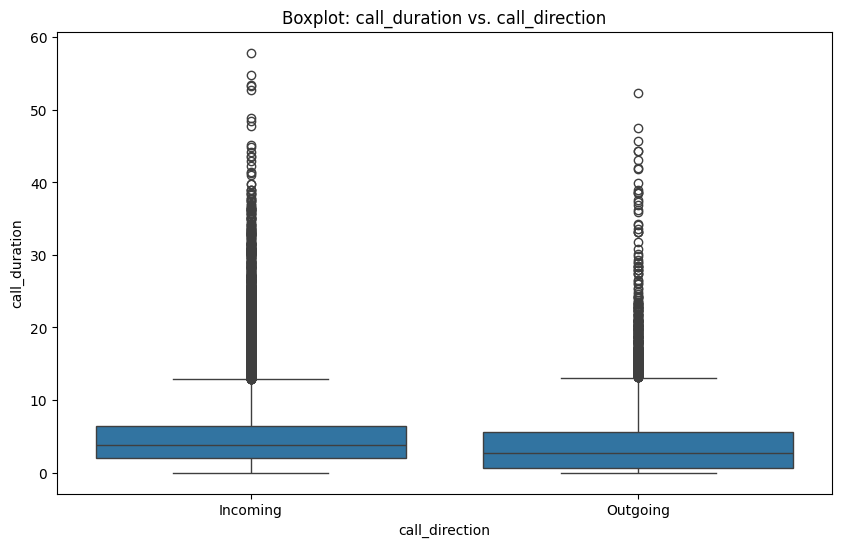

In [39]:
# Select categorical and numerical variables for analysis
selected_categorical = ['account_state', 'occupation', 'language', 'call_direction']
selected_numerical = ['account_age', 'call_duration']

# Plot boxplots for each combination
for cat_variable in selected_categorical:
    for num_variable in selected_numerical:
        plt.figure(figsize=(10, 6))
        sns.boxplot(x=cat_variable, y=num_variable, data=df)
        plt.title(f'Boxplot: {num_variable} vs. {cat_variable}')
        plt.show()


**Boxplot: account age vs. account state**

In Repayment: Accounts in repayment have a lower median age and a wide distribution with several outliers indicating some very old accounts.

Complete: Complete accounts have a higher median age with fewer outliers and less distribution width, indicating more consistency in account ages.

Cancelled: Cancelled accounts show a similar pattern to “In Repayment”, but with fewer extreme outliers.

Suspended: Suspended accounts have no visible box; only whiskers are shown, indicating limited data or less variation in account ages.

This suggests that accounts “In Repayment” and “Cancelled” have a wider range of ages, with some accounts being quite old. “Complete” accounts tend to be of middle age, not very new but not as old as some in the other categories. There is less data on “Suspended” accounts, but they appear to be newer on average.

When does the company  experience the most incoming call traffic? How does this vary over the course of the day? How does this compare to the number of outgoing calls being made over the 
course of the day?  



**Boxplot: call duration vs. account state**

In Repayment: Calls related to accounts in repayment have a wider range of durations with several outliers indicating some calls were significantly longer.

Complete: Calls related to complete accounts have a similar pattern to “In Repayment” with many outliers indicating some long-duration calls.

Cancelled and Suspended: Calls related to cancelled and suspended accounts are generally shorter in duration with fewer outliers.

This suggests that calls related to accounts “In Repayment” and “Complete” tend to last longer, while those related to “Cancelled” and “Suspended” accounts are generally shorter. This could be due to various factors such as the nature of the issues discussed during the calls, the effectiveness of the communication, or the customer service strategies employed for different account states.

**Boxplot: account_age vs. occupation**

Some occupations have a higher median account age, suggesting that those occupations are more common among older accounts.
Other occupations have a lower median account age, suggesting that those occupations are more common among newer accounts.
The significant variation in both the median ages and spreads for different occupations suggests that the age distribution of accounts is diverse across different occupations.

**Boxplot: account age vs. language**

There is a variation in account ages across different languages, indicating that there isn’t a specific cccount_age group that dominates any particular language.

Some languages, like Luganda and Acholi, have older accounts on average, suggesting that these languages are more common among older accounts.

Other languages, like Finnish and Waray, have younger accounts on average, suggesting that these languages are more common among newer accounts.

The significant variation in both the median ages and spreads for different languages suggests that the age distribution of accounts is diverse across different languages.

**Boxplot: account age vs. call direction**

Incoming Calls: Accounts associated with incoming calls have a wider range of ages, including some very old accounts. The median account age is around 400, with a large interquartile range extending up to approximately an account age of 1200. There are several outliers that extend up to an account age of around 1400.

Outgoing Calls: Accounts associated with outgoing calls are generally newer. The median account age is just above 800, with a smaller interquartile range than incoming calls.

This suggests that older accounts tend to have more incoming calls, while newer accounts have more outgoing calls. This could be due to various factors such as the nature of the issues discussed during the calls, the effectiveness of the communication, or the customer service strategies employed for different account ages.

**Boxplot: call_duration vs. call_direction**

Incoming Calls: Incoming calls have a similar median duration to outgoing calls, indicating that the length of the call does not significantly depend on its direction.

Outgoing Calls: Outgoing calls have a wider range of durations with several outliers indicating some very long call durations. This suggests that while most outgoing calls are of average length, there are some that last significantly longer.

This could be due to various factors such as the nature of the issues discussed during the calls, the effectiveness of the communication, or the customer service strategies employed for different call directions.

**How is the number of incoming and outgoing calls distributed over different hours of the day?**: Distribution of Incoming and Outgoing Calls Over the Day

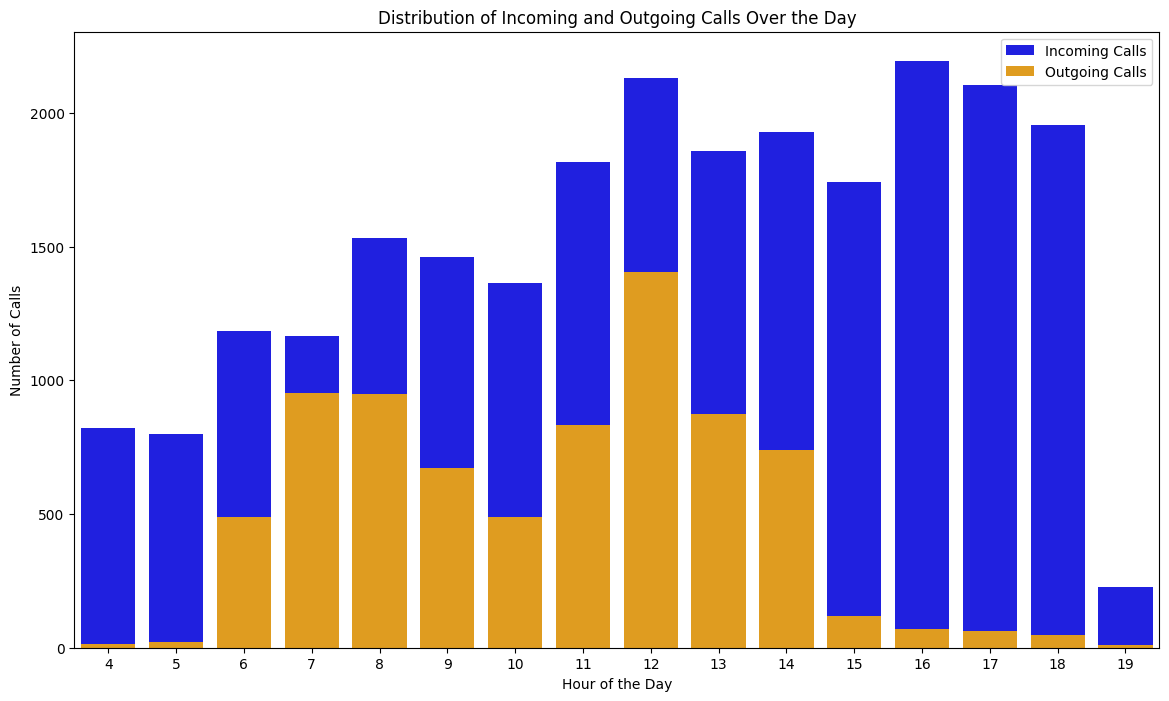

In [40]:
# Extract hour information from the 'call_end_date'
df['hour'] = df['call_end_date'].dt.hour

# Plot the distribution of incoming and outgoing calls over the course of the day
plt.figure(figsize=(14, 8))

# Incoming calls
sns.countplot(x='hour', data=df[df['call_direction'] == 'Incoming'], color='blue', label='Incoming Calls')

# Outgoing calls
sns.countplot(x='hour', data=df[df['call_direction'] == 'Outgoing'], color='orange', label='Outgoing Calls')

plt.title('Distribution of Incoming and Outgoing Calls Over the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Calls')
plt.legend()
plt.show()

Outgoing Calls: Outgoing calls are generally more frequent than incoming calls throughout the day. There is a significant increase in outgoing calls after 15:00, peaking at hour 18.

Incoming Calls: The number of incoming calls gradually increases from hour 4 to 14, but it’s always less than the number of outgoing calls. Incoming calls drop significantly at hour 19.

**How many customers do the company talk to each day?**

**How many customers called EEA multiple times in the 2 week period?**

**What was the company discussing with the customers who contacted them multiple times?**

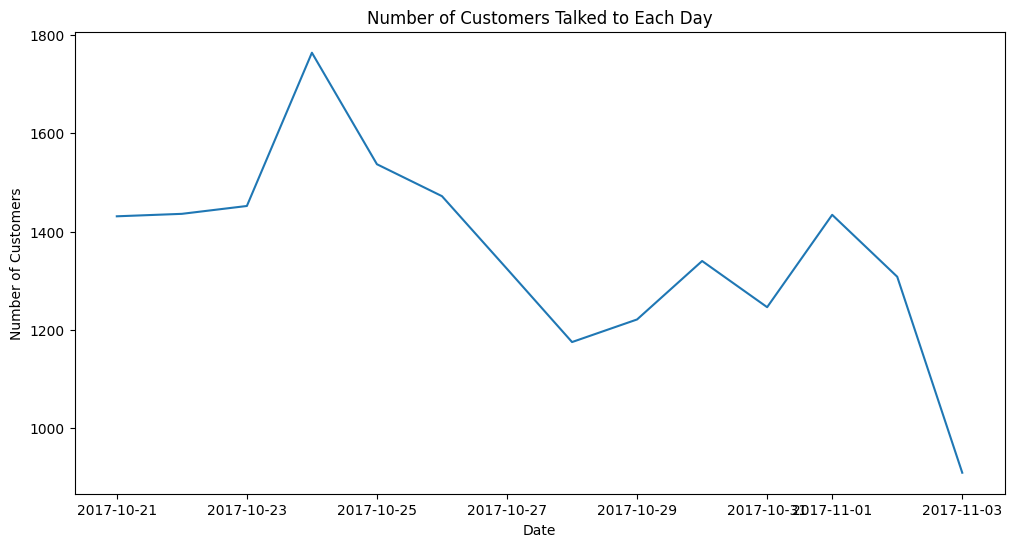

In [41]:
# Extract date information from the 'call_end_date'
df['date'] = df['call_end_date'].dt.date

# Question 1: How many customers does the company talk to each day?
daily_customer_count = df.groupby('date')['source_person_id'].nunique()

# Plot the number of customers talked to each day
plt.figure(figsize=(12, 6))
sns.lineplot(x=daily_customer_count.index, y=daily_customer_count.values)
plt.title('Number of Customers Talked to Each Day')
plt.xlabel('Date')
plt.ylabel('Number of Customers')
plt.show()

There is a noticeable peak on 2017-10-25, where the number of customers reached close to 1800. This suggests that on this particular day, the customer interaction was significantly higher than other days. Following this peak, there’s a sharp decline and subsequent fluctuations in customer counts. This indicates variability in the daily customer interactions.

Overall, the number of customers talked to each day varies over time, indicating that customer interactions are not consistent and can change from day to day.

These insights could be useful for understanding the dynamics of customer interactions and could inform strategies for customer engagement and resource allocation. However, further investigation would be needed to understand the reasons behind these patterns. For example, why there was a peak on 2017-10-25 and why there were subsequent fluctuations. These could be related to various factors such as marketing campaigns, product launches, or seasonal trends.

In [42]:
# Question 2: How many customers called EEA multiple times in the 2-week period?
multiple_calls = df['source_person_id'].value_counts()

# Identify customers who called multiple times
customers_with_multiple_calls = multiple_calls[multiple_calls > 1].index

# Question 3: What was the company discussing with customers who contacted us multiple times?
topics_for_multiple_calls = df[df['source_person_id'].isin(customers_with_multiple_calls)]['call_topics']

# Display the unique topics discussed with customers who called multiple times
unique_topics = topics_for_multiple_calls.explode().unique()
print("Unique Topics Discussed with Customers who Called Multiple Times:")
print(unique_topics)

Unique Topics Discussed with Customers who Called Multiple Times:
['Code Not Received' 'Code Entered Late, Code Not Received'
 'General Question' 'Call transfer' 'Ended Call- Hearing/Speaking Issues'
 'ReadyRefer 3 Days Inquiry' 'Customer NOT with PS'
 'Does Not Charge From Mains' 'Code Entry Support'
 'General Question, Ended Call- Hearing/Speaking Issues'
 'General Question, Mistaken Payment, Call Dropped'
 'RP Remote Non-Technical' 'Overdue Account'
 'MM Issue, Lockout Date Inquiry, Technical product inquiry '
 'Does Not Charge From Solar' 'Code Not Received, Ready Radio Technical'
 'Balance Inquiry' 'Call Dropped' 'SMS Inquiry'
 'Balance Inquiry, Lockout Date Inquiry'
 '3 Series LED Light Bar Non-Technical'
 'Payment procedure information request' 'Advance Code'
 'Technical product inquiry ' 'RP Remote Technical' 'Early Lockout'
 'RPC Follow Up' 'Referral bonus not received' 'Refund Question'
 'Balance Inquiry, Code Not Received'
 'Balance Inquiry, Technical product inquiry ' '10 D

In [65]:
# Count the number of calls per customer
customer_call_counts = df['source_person_id'].value_counts()

# Filter customers who called multiple times
multiple_call_customers = customer_call_counts[customer_call_counts > 1]

# Get the count of customers who called multiple times
num_customers_multiple_calls = len(multiple_call_customers)

print(f"The number of customers who called EEA multiple times in the 2-week period: {num_customers_multiple_calls}")


The number of customers who called EEA multiple times in the 2-week period: 5437


**Do 10 Day Call surveys take longer for EEA's call center representatives to complete than Completions Call surveys?**  

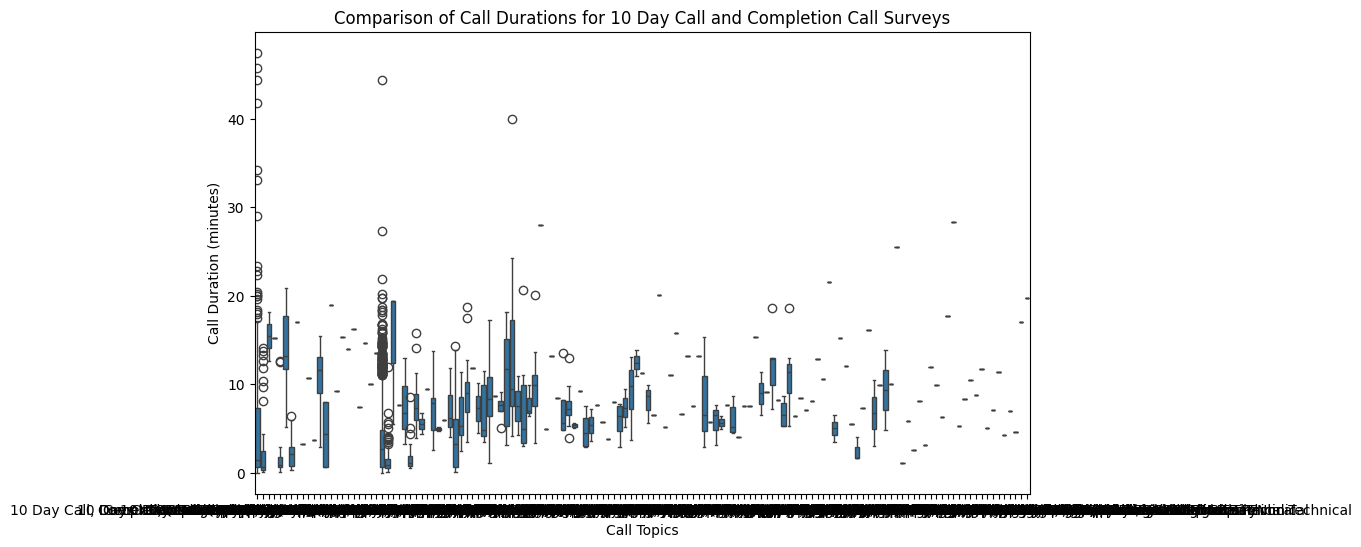

In [45]:
# Extract the call topics and call duration for the relevant surveys
ten_day_calls = df[df['call_topics'].str.contains('10 Day', case=False, na=False)]
completion_calls = df[df['call_topics'].str.contains('Completion', case=False, na=False)]

# Combine the data for the boxplot
combined_data = pd.concat([ten_day_calls, completion_calls])

# Plot a boxplot to compare the durations of 10 Day Call and Completion Call surveys
plt.figure(figsize=(10, 6))
sns.boxplot(x='call_topics', y='call_duration', data=combined_data)
plt.title('Comparison of Call Durations for 10 Day Call and Completion Call Surveys')
plt.xlabel('Call Topics')
plt.ylabel('Call Duration (minutes)')
plt.show()

There is a wide variation in call durations across different call topics, indicating that the length of the call significantly depends on its topic. Some call topics result in both short and long durations, indicating a wide distribution. This suggests that the same topic can lead to different lengths of discussions depending on various factors such as the complexity of the issue, the customer’s understanding, or the effectiveness of the communication.

The plot compares two types of calls: 10 Day Calls and Completion Calls. While the exact differences between these two types of calls are not clear from the plot, it appears that both types show a similar pattern of variation in call duration across different topics.

**Should we be looking at a customer's occupation when we decide when to call them?** 

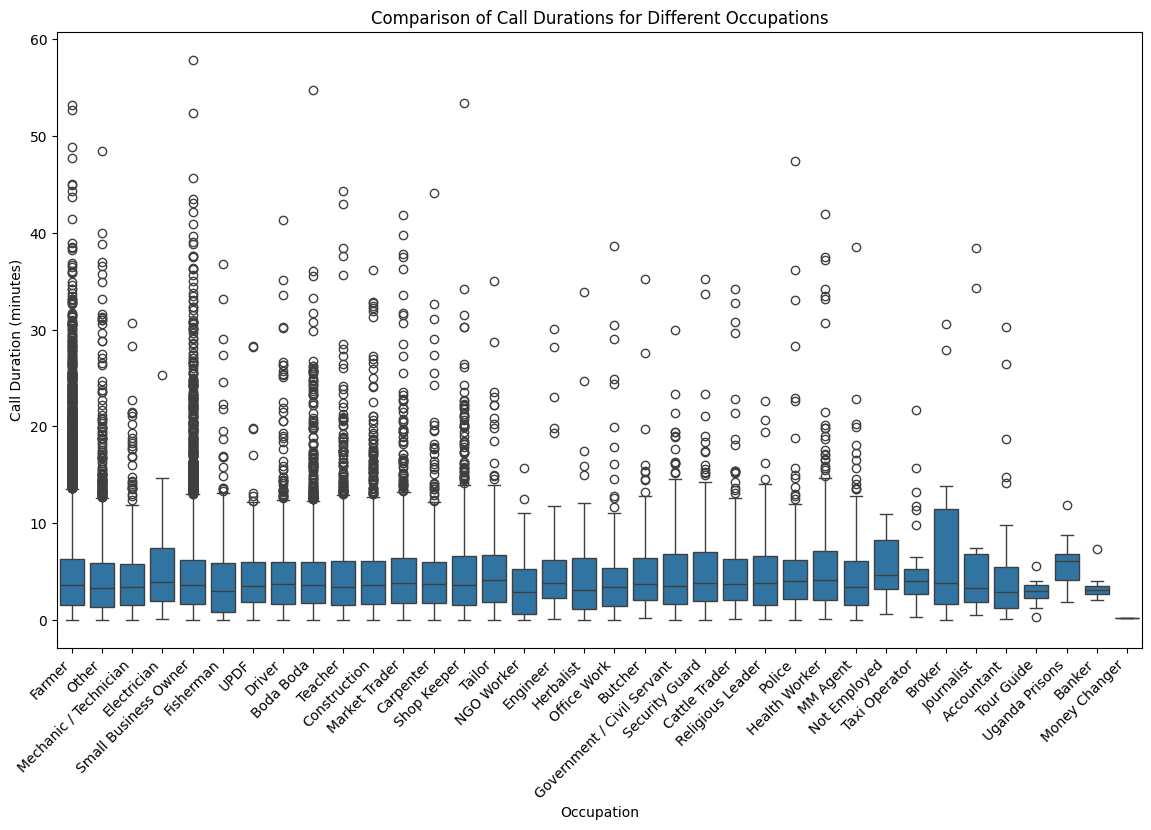

In [46]:
# Select relevant columns
occupation_call_data = df[['occupation', 'call_duration']]

# Plot a boxplot to compare call durations for different occupations
plt.figure(figsize=(14, 8))
sns.boxplot(x='occupation', y='call_duration', data=occupation_call_data)
plt.title("Comparison of Call Durations for Different Occupations")
plt.xlabel("Occupation")
plt.ylabel("Call Duration (minutes)")
plt.xticks(rotation=45, ha='right')
plt.show()

Retired: People in the “Retired” category tend to have longer call durations, with several calls exceeding 40 minutes. This suggests that retired individuals may have more time to engage in longer calls.

Housemaid and Unemployed: Occupations like “Housemaid” and “Unemployed” show a wide range of call durations. This could indicate variability in the nature of the calls or the availability of individuals in these occupations.

Student, Technician, and Various Managerial Roles: Occupations like “Student”, “Technician”, and various managerial roles have shorter and more consistent call durations. This could suggest that individuals in these roles have less time for calls or that their calls are more focused and efficient.

**Time-Based Analysis:**

**How does call traffic vary across different days of the week and times of the day?**
**Are there any seasonal trends or patterns in call volumes?**

In [48]:
# Extract day of the week and hour information
df['day_of_week'] = df['call_end_date'].dt.day_name()
df['hour_of_day'] = df['call_end_date'].dt.hour

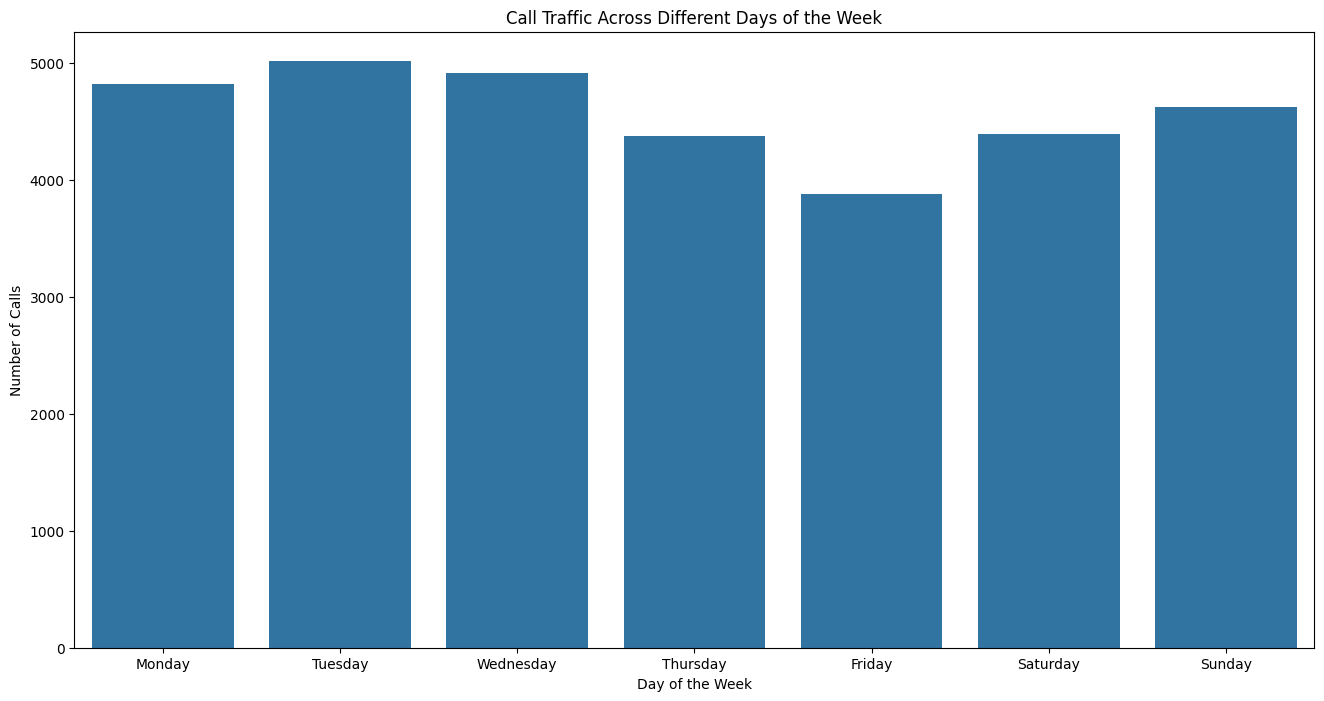

In [49]:
# Plot call traffic across different days of the week
plt.figure(figsize=(16, 8))
sns.countplot(x='day_of_week', data=df, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Call Traffic Across Different Days of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Calls')
plt.show()

Monday to Wednesday: These days have the highest call traffic, with over 5000 calls each day. This suggests that the beginning of the week is the busiest period in terms of call volume.

Thursday and Friday: The call traffic decreases slightly on these days but still remains relatively high.
Weekend: The call traffic is at its lowest during the weekend (Saturday and Sunday). This could be due to reduced business hours or fewer customer interactions over the weekend.

This suggests that call center resources might need to be allocated more towards the beginning of the week to handle the higher call volume. However, further investigation would be needed to understand the reasons behind these patterns and to make informed decisions. For example, why there is a decrease in call traffic towards the end of the week and during the weekend. These insights could be useful for strategizing customer service efforts.

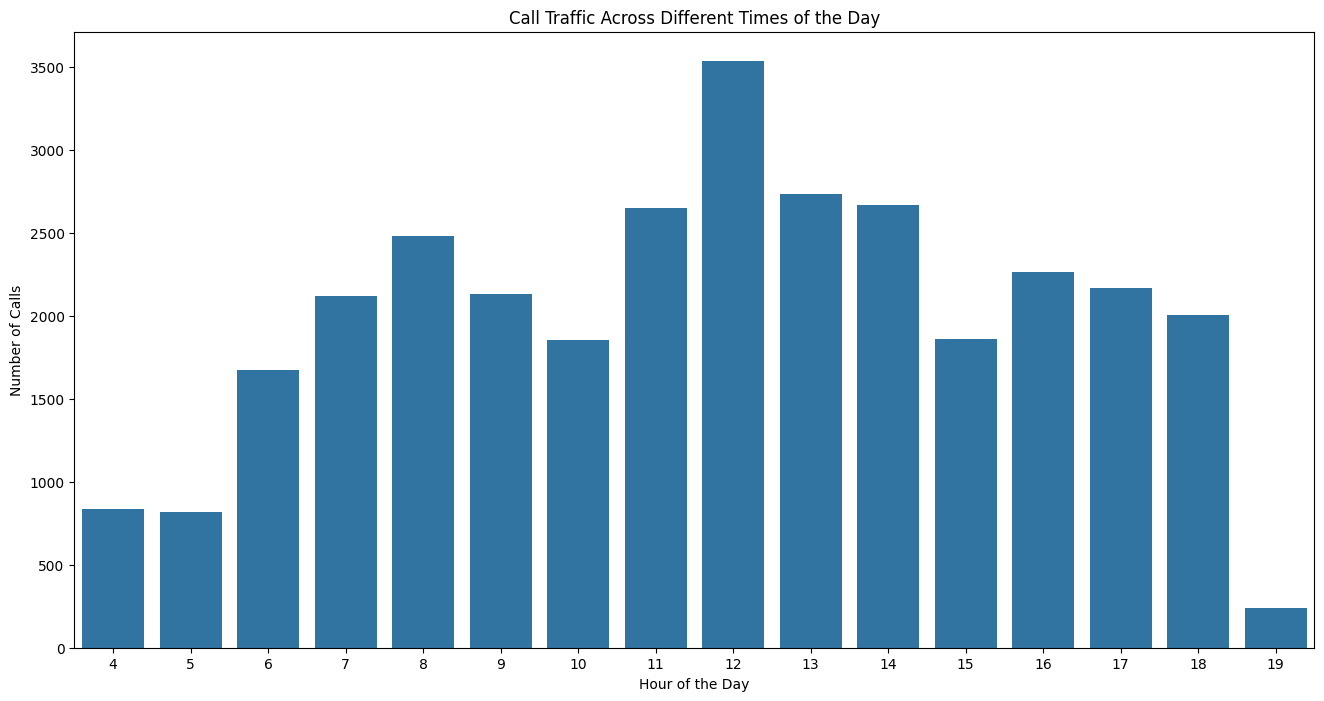

In [50]:
# Plot call traffic across different times of the day
plt.figure(figsize=(16, 8))
sns.countplot(x='hour_of_day', data=df)
plt.title('Call Traffic Across Different Times of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Calls')
plt.show()

Morning (4 AM to 8 AM): Call traffic starts low at 4 AM, which could be due to fewer customers being active at this early hour. It then increases significantly by 8 AM, suggesting the start of the business day.

Midday (8 AM to 1 PM): There is a noticeable increase in call traffic at 8 AM and 11 AM, with the peak occurring around 1 PM. This could be due to customers trying to reach out during their lunch breaks or businesses being most active during these hours.

Afternoon and Evening (1 PM to 7 PM): After the peak at 1 PM, call traffic gradually decreases throughout the afternoon and evening. This could be due to businesses closing for the day or customers being less active during these hours.

**Team Performance:**

**How does the performance (e.g., call duration, outcomes) vary among different call center teams (sales, support, success)?**

**Are there teams that consistently handle longer or more successful calls?**

In [51]:
# Extract relevant columns for team performance analysis
team_performance = df[['call_duration', 'call_outcome', 'call_direction']]

# Create a new column for call center teams
team_performance['call_center_team'] = df['call_topic_group']


C:\Users\admin\AppData\Local\Temp\ipykernel_12700\1393483032.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  team_performance['call_center_team'] = df['call_topic_group']


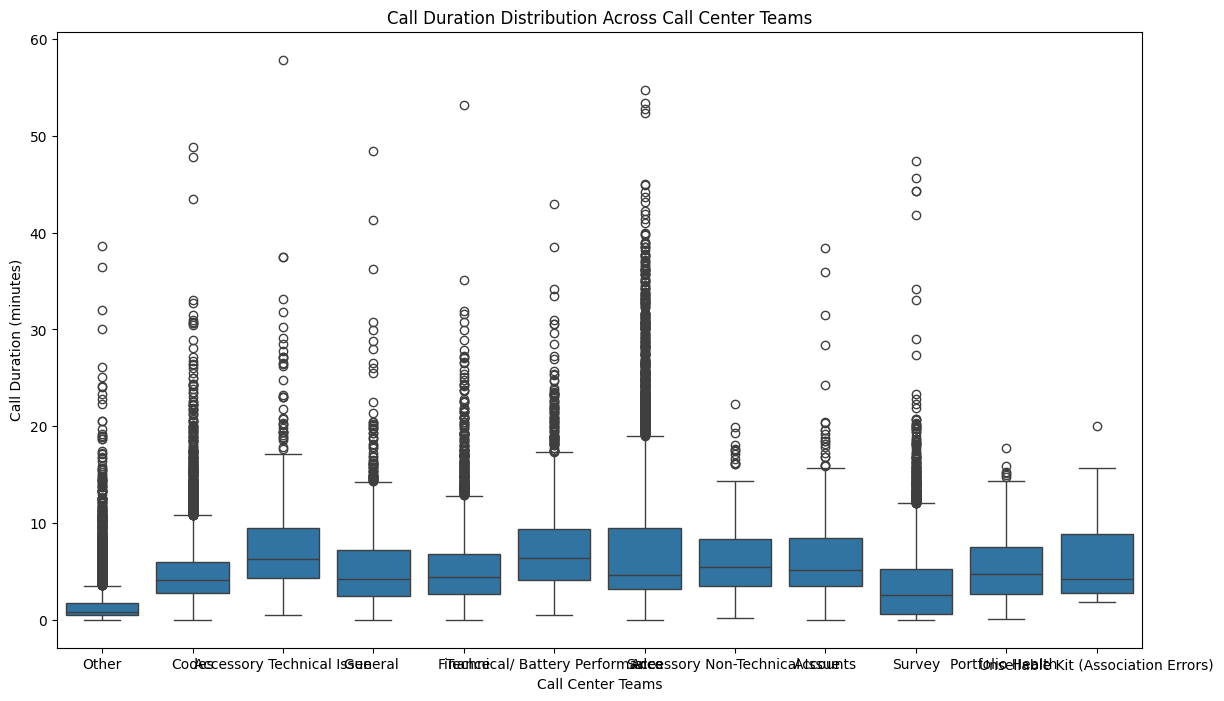

In [52]:
# Plot boxplots to compare call duration among different teams
plt.figure(figsize=(14, 8))
sns.boxplot(x='call_center_team', y='call_duration', data=team_performance)
plt.title('Call Duration Distribution Across Call Center Teams')
plt.xlabel('Call Center Teams')
plt.ylabel('Call Duration (minutes)')
plt.show()

Technical and Battery Performance Teams: These teams have a wider range of call durations, with some calls lasting up to 60 minutes. This suggests that issues handled by these teams may be more complex and require longer discussions.

Other Teams: The other teams generally have shorter and more consistent call durations, indicating that their calls are more straightforward and require less time.

Median Call Durations: Most of the teams have median call durations around 10 to 20 minutes. This could be considered as the typical call duration across different teams.

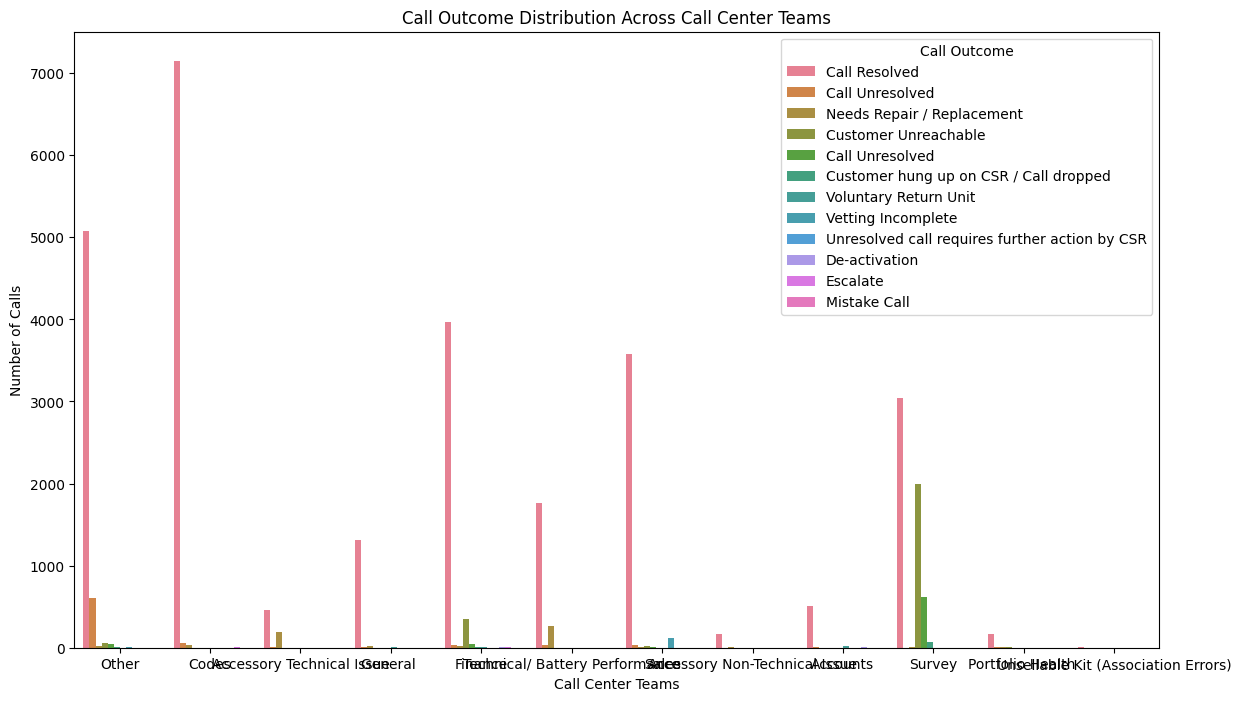

In [53]:
# Plot bar plots to compare call outcome distribution among different teams
plt.figure(figsize=(14, 8))
sns.countplot(x='call_center_team', hue='call_outcome', data=team_performance)
plt.title('Call Outcome Distribution Across Call Center Teams')
plt.xlabel('Call Center Teams')
plt.ylabel('Number of Calls')
plt.legend(title='Call Outcome')
plt.show()

Other Team: The “Other” team has a significantly higher number of resolved calls compared to other teams. This suggests that this team is effective in resolving issues.

Technical and Non-Technical Teams: These teams have a notable amount of unresolved calls. This could indicate that the issues handled by these teams are more complex and may require multiple calls or additional steps to resolve.

Call Outcomes: The plot shows a variety of call outcomes including resolved, unresolved, needs repair/replacement, customer unreachable, and others. This suggests that the call center handles a wide range of issues and situations.

**Customer Retention:**

**What are the factors associated with customer retention or churn?**
**Are there specific call topics or interactions linked to customers who cancel or complete their accounts?**

C:\Users\admin\AppData\Local\Temp\ipykernel_12700\2598653462.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  retention_data['account_state_numeric'] = df['account_state'].astype('category').cat.codes
C:\Users\admin\AppData\Local\Temp\ipykernel_12700\2598653462.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  retention_data['call_outcome_numeric'] = df['call_outcome'].astype('category').cat.codes


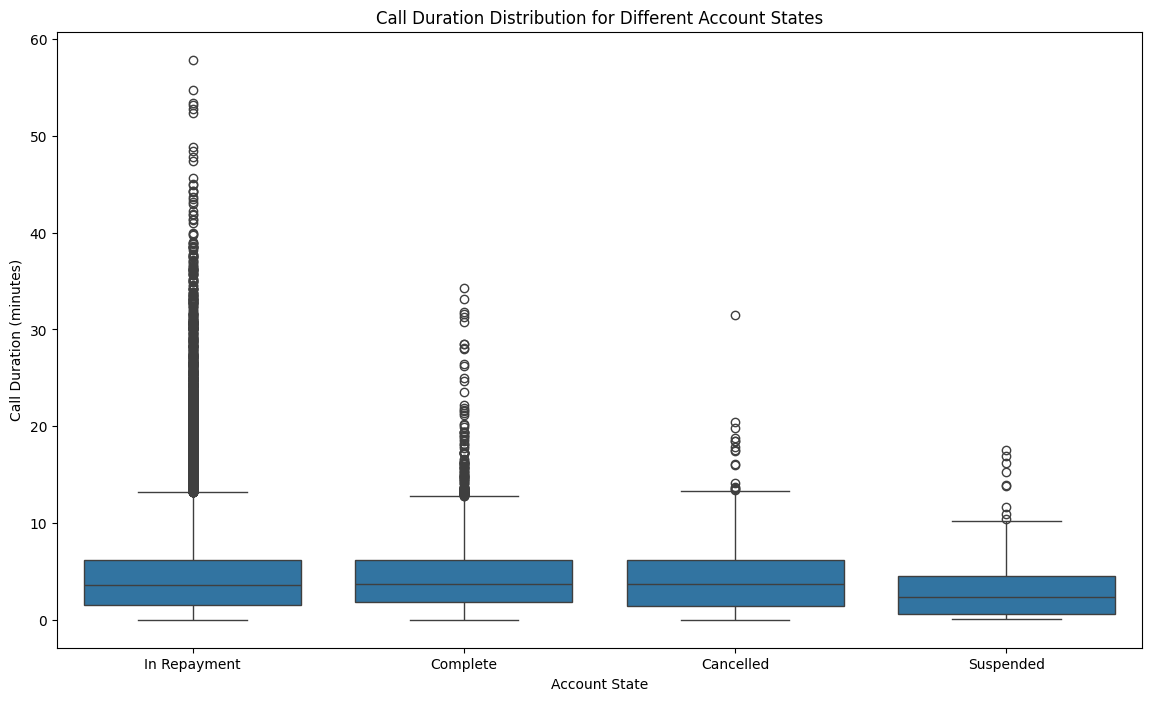

In [57]:
# Extract relevant columns for customer retention analysis
retention_data = df[['account_state', 'call_duration', 'call_outcome', 'call_topic_group']]

# Convert categorical variables to numerical for analysis
retention_data['account_state_numeric'] = df['account_state'].astype('category').cat.codes
retention_data['call_outcome_numeric'] = df['call_outcome'].astype('category').cat.codes

# Plot boxplots to compare call duration for different account states
plt.figure(figsize=(14, 8))
sns.boxplot(x='account_state', y='call_duration', data=retention_data)
plt.title('Call Duration Distribution for Different Account States')
plt.xlabel('Account State')
plt.ylabel('Call Duration (minutes)')
plt.show()

In Repayment: Accounts in repayment have a wide range of call durations, with many calls lasting longer than those in other account states. This suggests that calls related to these accounts may involve more complex or numerous issues that require more time to address.

Complete and Cancelled: Complete and cancelled accounts also have varied call durations but less so than “In Repayment”. This could indicate that the issues handled by these accounts are less complex or numerous.

Suspended: Calls to suspended accounts are relatively consistent in duration, suggesting that they are likely related to a specific set of issues that take a similar amount of time to address.

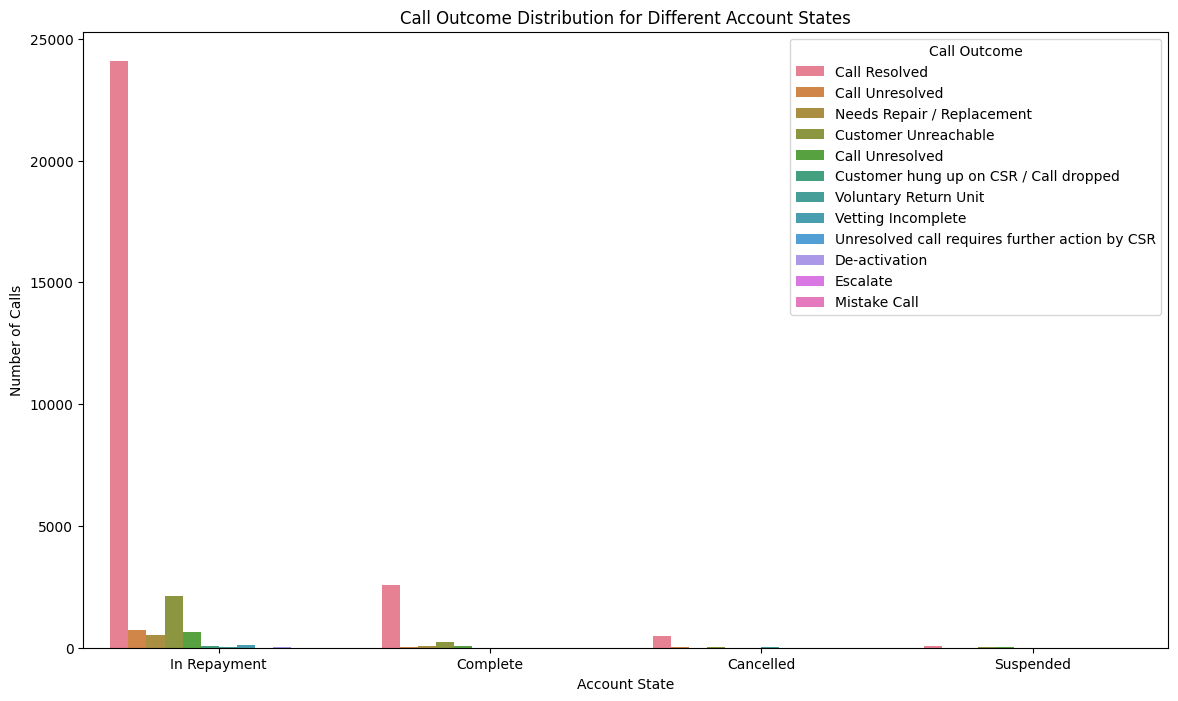

In [58]:
# Plot count plots to visualize call outcome distribution for different account states
plt.figure(figsize=(14, 8))
sns.countplot(x='account_state', hue='call_outcome', data=retention_data)
plt.title('Call Outcome Distribution for Different Account States')
plt.xlabel('Account State')
plt.ylabel('Number of Calls')
plt.legend(title='Call Outcome')
plt.show()

In Repayment: A significant number of calls are resolved for accounts in this state, indicating effective communication or problem resolution for these accounts. However, there are also various other call outcomes like unresolved calls, need for repair/replacement, and customer unreachability that are more prominent in this state. This suggests that while many issues are resolved, there are still a number of challenges to address.

Complete and Cancelled: These states have a minimal number of calls associated with them, which could suggest that fewer issues arise once an account reaches these states.

Suspended: No data is shown for this account state, which could indicate that there are very few or no calls associated with suspended accounts.

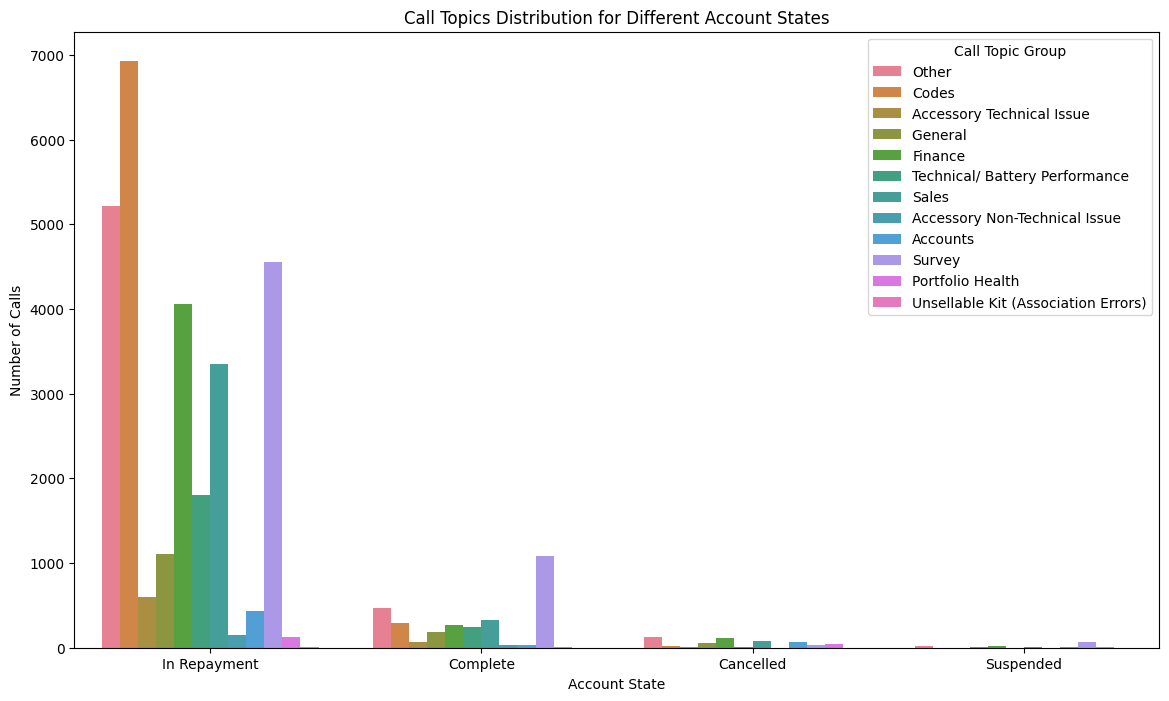

In [59]:
# Plot count plots to visualize call topics distribution for different account states
plt.figure(figsize=(14, 8))
sns.countplot(x='account_state', hue='call_topic_group', data=retention_data)
plt.title('Call Topics Distribution for Different Account States')
plt.xlabel('Account State')
plt.ylabel('Number of Calls')
plt.legend(title='Call Topic Group')
plt.show()

In Repayment: Accounts in repayment have the highest number of calls, with “General” and “Finance” being the most common topics. This suggests that these accounts may have a variety of issues or inquiries that require assistance.

Complete: For complete accounts, calls are relatively fewer and more evenly distributed across topics. This could indicate that once an account is complete, the nature of the calls becomes more varied and less focused on specific issues.

Cancelled and Suspended: Cancelled and suspended accounts have significantly fewer calls. This could be due to fewer issues arising once an account reaches these states, or it could be a result of policies regarding communication with these accounts.

**Customer Satisfaction:**

**Can customer satisfaction be inferred from call outcomes or call durations?**
**Are there specific call topics associated with high or low customer satisfaction?**



C:\Users\admin\AppData\Local\Temp\ipykernel_12700\3623219096.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  satisfaction_data['call_outcome_numeric'] = df['call_outcome'].astype('category').cat.codes


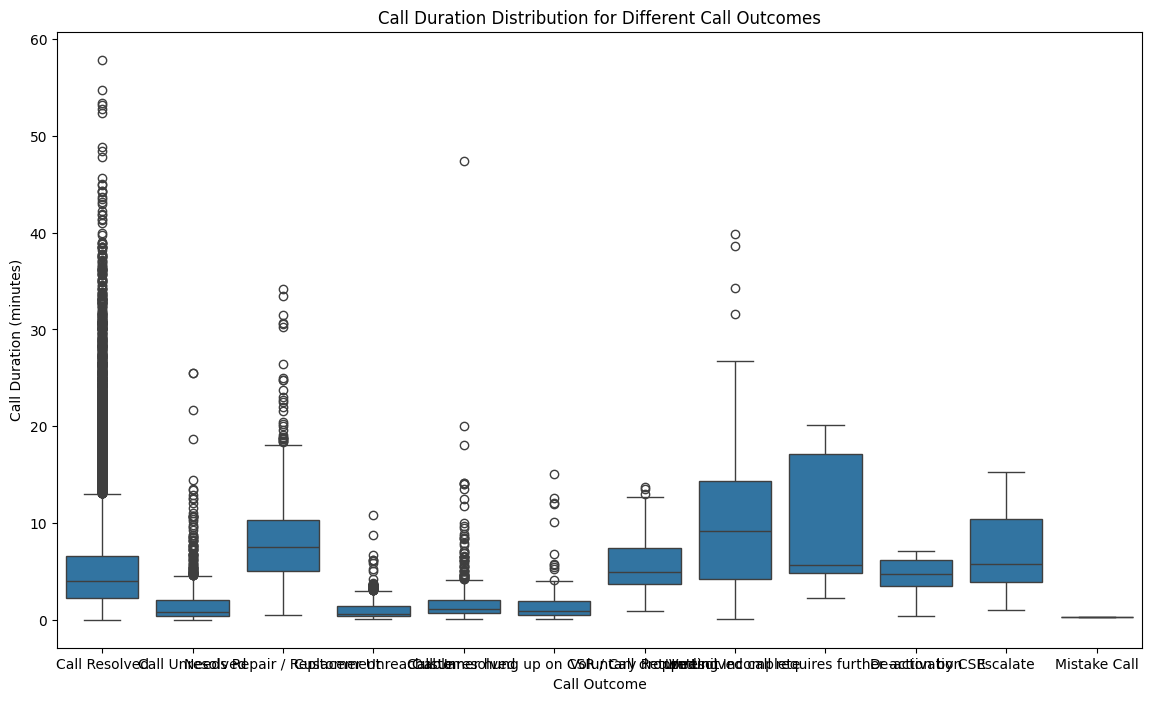

In [61]:
# Extract relevant columns for customer satisfaction analysis
satisfaction_data = df[['call_outcome', 'call_duration', 'call_topic_group']]

# Convert categorical variables to numerical for analysis
satisfaction_data['call_outcome_numeric'] = df['call_outcome'].astype('category').cat.codes

# Plot boxplots to compare call duration for different call outcomes
plt.figure(figsize=(14, 8))
sns.boxplot(x='call_outcome', y='call_duration', data=satisfaction_data)
plt.title('Call Duration Distribution for Different Call Outcomes')
plt.xlabel('Call Outcome')
plt.ylabel('Call Duration (minutes)')
plt.show()

Call Resolved: Calls that are resolved generally have shorter durations. This suggests that issues are addressed efficiently in these calls. However, there are many outliers, indicating that some resolved calls do take longer.

Unresolved/Repair: Calls that are unresolved or require repair show a wider distribution of call durations. This could indicate that these calls involve more complex issues that require more time to address.

Customer hung up on CSR and Customer requested further action by CSR/Escalate: These categories show higher median durations and wider distributions, indicating variability in call lengths. This could be due to a variety of factors such as the complexity of the issue, customer behavior, or the need for further action.

Mistake Call: Mistake calls have the shortest duration, which is expected as these calls are likely ended quickly once the mistake is realized.

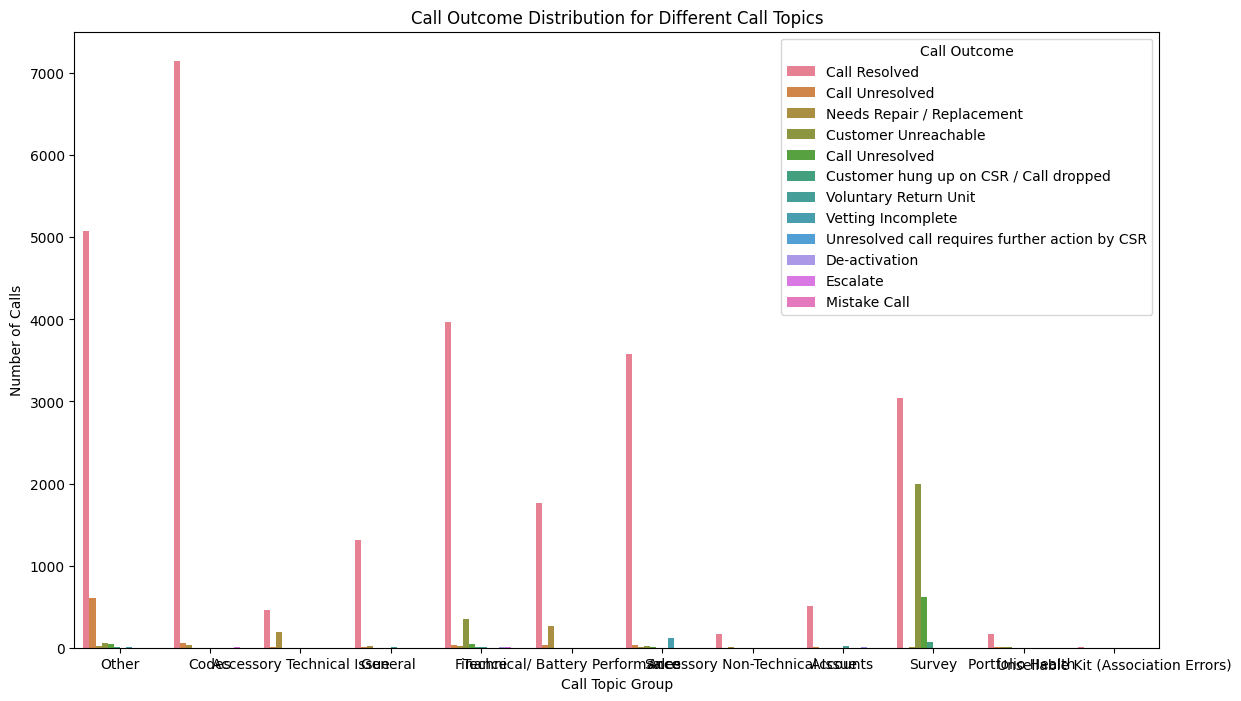

In [62]:
# Plot count plots to visualize call outcome distribution for different call topics
plt.figure(figsize=(14, 8))
sns.countplot(x='call_topic_group', hue='call_outcome', data=satisfaction_data)
plt.title('Call Outcome Distribution for Different Call Topics')
plt.xlabel('Call Topic Group')
plt.ylabel('Number of Calls')
plt.legend(title='Call Outcome')
plt.show()

Technical: Calls related to “Technical” issues have the highest number of resolved cases. This suggests that these issues are effectively addressed during the calls.

Battery Performance and Non-Technical: These topics have a significant number of unresolved cases. This could indicate that these issues are more complex or require additional steps to resolve.

Customer Unreachable: There are a notable number of calls where the customer is unreachable across various topics. This could be due to various factors such as the customer’s availability or contact information accuracy.

**Strategic Implications and Recommendations**


**Customer Segmentation:**
Tailor communication strategies based on account states to address specific customer needs effectively.

**Optimizing Resources:**
Allocate resources efficiently to handle the influx of incoming calls, ensuring prompt and effective customer support.

**Proactive Outbound Engagement:**
Leverage insights from outgoing calls for proactive engagement, feedback gathering, and support initiatives.

**Enhancing Language-Specific Support:**
Recognize language diversity to provide effective support, ensuring clear communication and customer satisfaction.

**Daily Resource Allocation:**
Consider resource allocation based on daily and time-based call traffic patterns for optimal efficiency.

**Topic-Specific Strategies:**
Develop targeted strategies for specific call topics to enhance customer satisfaction and issue resolution.

**Continuous Monitoring and Investigation:**
Implement ongoing monitoring and further investigation to understand customer interaction dynamics, ensuring informed 
decision-making.

**Customer Service Optimization:**
Strategize customer service efforts based on account state, call direction, and call outcome patterns.